<a href="https://colab.research.google.com/github/gautampatil-groot/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
store = pd.read_csv('/content/drive/MyDrive/Datasets/store.csv')
rossman = pd.read_csv('/content/drive/MyDrive/Datasets/Rossmann Stores Data.csv')

<ipython-input-3-53d352f14bd9>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman = pd.read_csv('/content/drive/MyDrive/Datasets/Rossmann Stores Data.csv')


In [4]:
rossman_csv = rossman.copy()
store_csv = store.copy()

In [5]:
rossman_csv.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossman_csv.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
rossman_csv.shape

(1017209, 9)

In [8]:
rossman_csv.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
rossman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
rossman_csv.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [11]:
rossman_csv.StateHoliday.replace('0',0,inplace = True)
rossman_csv.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [12]:
rossman_csv.describe().round(1)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0
mean,558.4,4.0,5773.8,633.1,0.8,0.4,0.2
std,321.9,2.0,3849.9,464.4,0.4,0.5,0.4
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0


In [13]:
print(rossman_csv['Date'].min())
print(rossman_csv['Date'].max())

2013-01-01
2015-07-31


In [14]:
rossman_csv['Date'] = pd.to_datetime(rossman_csv['Date'], format = "%Y-%m-%d")
rossman_csv['Year'] = rossman_csv['Date'].dt.year
rossman_csv['Month'] = rossman_csv['Date'].dt.month
rossman_csv['Dates'] = rossman_csv['Date'].dt.strftime('%d')
rossman_csv.drop(axis = 1, columns = ['Date'], inplace = True)

In [15]:
# # set style and context for plot
# sns.set_style("darkgrid")
# sns.set_context("paper")

# # plot the lmplot
# sns.lmplot(x='Customers', y='Sales', data=rossman_csv, line_kws={'color': 'red'}, aspect = 1.5, scatter_kws={'alpha': 0.4})

# # set plot title and labels
# plt.title('Customers vs Sales')
# plt.xlabel('Number of Customers')
# plt.ylabel('Sales')

# # display the plot
# plt.show()

#insights -
1
2
3
4

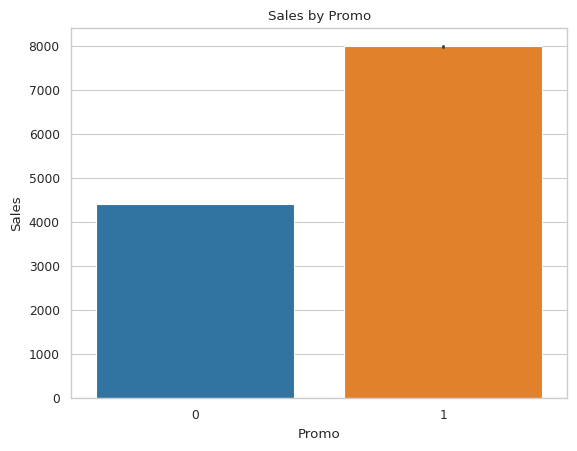

In [16]:
# sns.barplot(x = 'Promo', y = 'Sales', data = rossman_csv)
# set style and context for plot
sns.set_style("whitegrid")
sns.set_context("paper")

# plot the barplot
sns.barplot(x='Promo', y='Sales', data=rossman_csv)

# set plot title and labels
plt.title('Sales by Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')

# display the plot
plt.show()

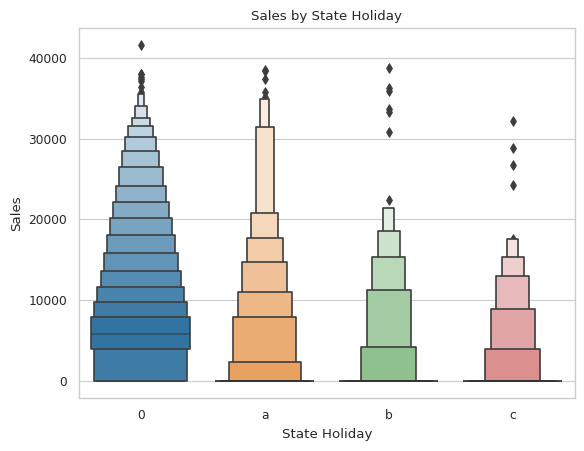

In [17]:
# sns.boxenplot(x = 'StateHoliday', y = 'Sales', data = rossman_csv, scale="linear")

# plot the boxenplot
sns.boxenplot(x='StateHoliday', y='Sales', data=rossman_csv, scale="linear")

# set plot title and labels
plt.title('Sales by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')

# remove the top and right spines of the plot


# display the plot
plt.show()

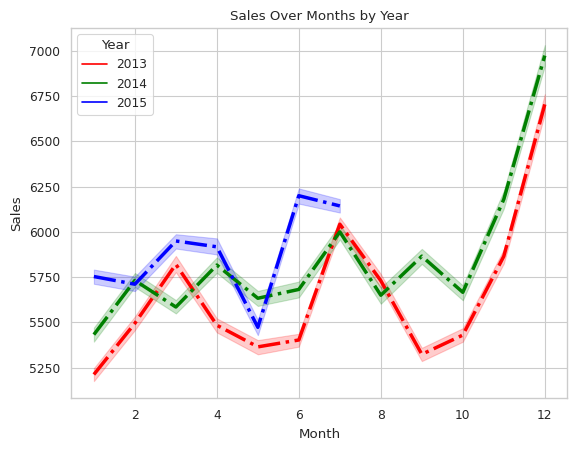

In [18]:
# plt.figure(figsize=(8, 6))
# colors = ['red', 'green', 'blue']
# sns.lineplot(data = rossman_csv, x = 'Month', y = 'Sales',hue = 'Year', linestyle='-.', palette = colors)
# set style and context for plot
sns.set_style("whitegrid")
sns.set_context("paper")

# set color palette for lines
colors = ['red', 'green', 'blue']

# plot the lineplot
sns.lineplot(data=rossman_csv, x='Month', y='Sales', hue='Year', palette=colors, linestyle='-.', linewidth=2.5)

# set plot title and labels
plt.title('Sales Over Months by Year')
plt.xlabel('Month')
plt.ylabel('Sales')

# add legend to the plot
plt.legend(title='Year', loc='best')

# display the plot
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='count'>

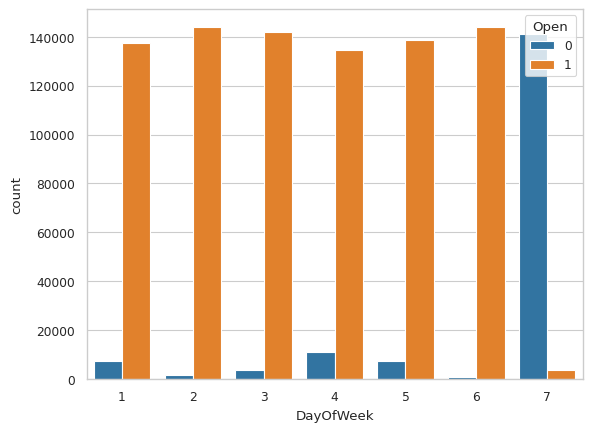

In [19]:
sns.countplot(data = rossman_csv, x = 'DayOfWeek', hue = 'Open')

<ipython-input-20-b22192ed13ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mapp = rossman_csv[rossman_csv.columns].corr()


<Axes: >

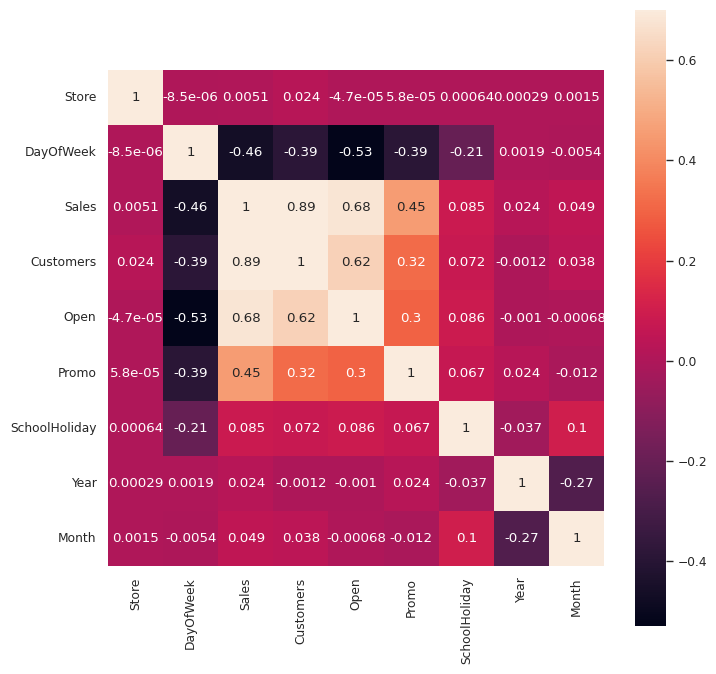

In [20]:
mapp = rossman_csv[rossman_csv.columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(mapp,vmax=.7, square=True,annot=True)

# **Store Dataset**

In [21]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [23]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [24]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [25]:
#Dropping columns with more numbers of NaN values
store.drop(axis = 1, columns = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], inplace = True)

In [26]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


<ipython-input-27-4ecf31e31d82>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=store, x='StoreType', y='CompetitionDistance', palette='Set1', height=6, aspect=1.2)


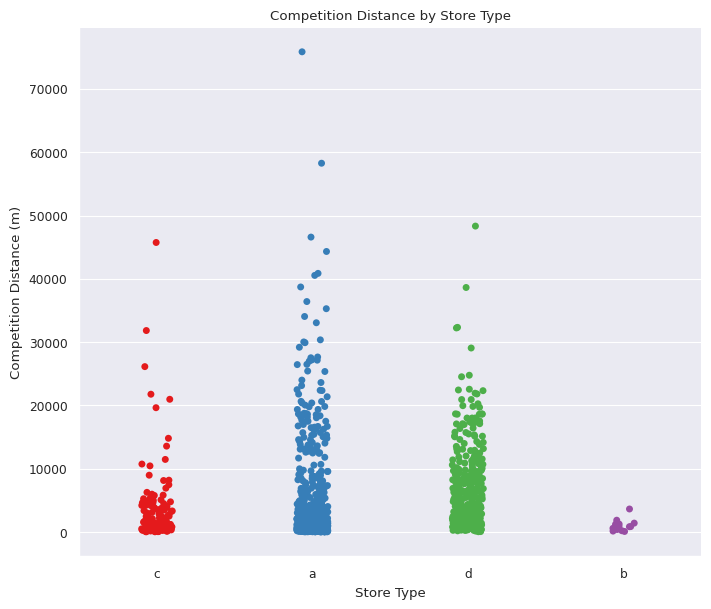

In [27]:
sns.set_style("darkgrid")

sns.catplot(data=store, x='StoreType', y='CompetitionDistance', palette='Set1', height=6, aspect=1.2)

plt.title('Competition Distance by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance (m)')

plt.show()

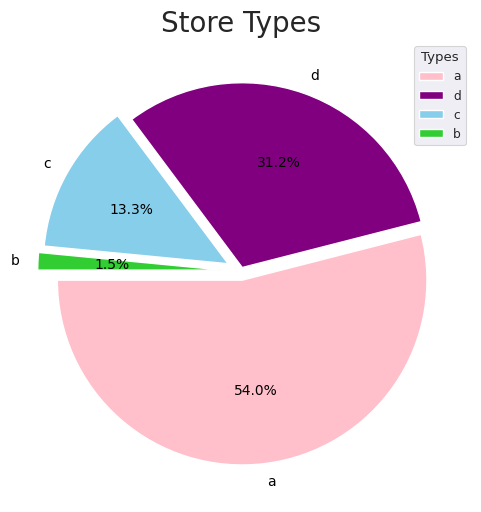

In [28]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Define the colors for the pie chart
colors = ['pink','purple','skyblue','limegreen']

# Define the explode values for the pie chart
explode = (0.05, 0.02, 0.08, 0.1)

# Define the wedge properties for the pie chart
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}

# Define the text properties for the pie chart
textprops = {'fontsize': 10, 'color': 'black'}

# Generate the pie chart
plt.pie(store.StoreType.value_counts(), labels=['a', 'd', 'c', 'b'], colors=colors, explode=explode, autopct='%1.1f%%', startangle=180, wedgeprops=wedgeprops, textprops=textprops)

# Add a title to the plot
plt.title('Store Types', fontsize=20)

# Add a legend to the plot
plt.legend(title='Types', loc='best')

# Show the plot
plt.show()

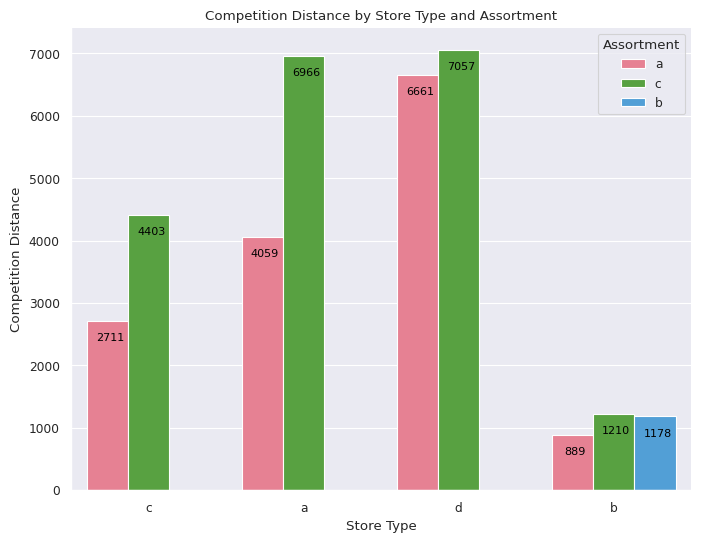

In [29]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the barplot
st = sns.barplot(data = store, x = 'StoreType', y = 'CompetitionDistance', hue = 'Assortment', palette = 'husl', errorbar=None)

# Add annotations to the bars
for p in st.patches:
    st.annotate(f'\n{p.get_height():.0f}', (p.get_x()+0.15, p.get_height()), ha='center', va='top', color='Black', size=8)


# Set the title and axes labels
plt.title('Competition Distance by Store Type and Assortment')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')

# Remove the top and right spines
sns.despine(top=True, right=True)

# Add a legend with a title
plt.legend(title='Assortment', loc='upper right')

# Show the plot
plt.show()

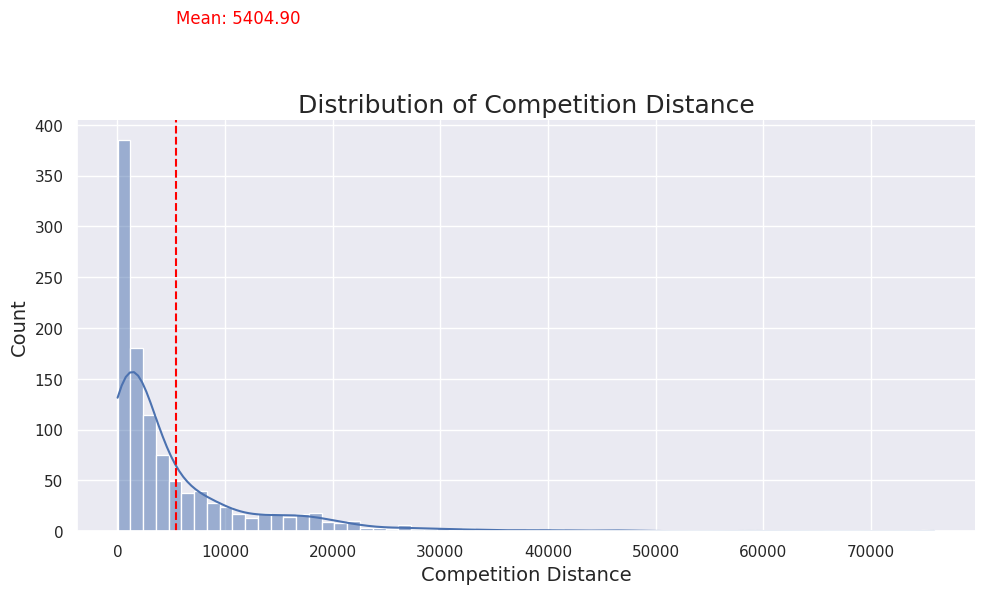

In [30]:
sns.set(style="darkgrid")

# Plot histogram and kernel density estimate (KDE)
sns.displot(store['CompetitionDistance'], kde=True, aspect=2)

# Add vertical line to indicate the mean value
mean_val = store['CompetitionDistance'].mean()
plt.axvline(mean_val, color='red', linestyle='--')
plt.text(mean_val+50, 500, f'Mean: {mean_val:.2f}', color='red', fontsize=12)

# Add title and labels for the plot
plt.title('Distribution of Competition Distance', fontsize=18)
plt.xlabel('Competition Distance', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

# Merging Two Datasets

In [31]:
sales = pd.merge(rossman_csv , store, how='left', on = 'Store')
sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Dates,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0


In [32]:
sales.shape

(1017209, 15)

<ipython-input-33-9b49dffd7811>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales.corr().abs().round(4), annot=True)


<Axes: >

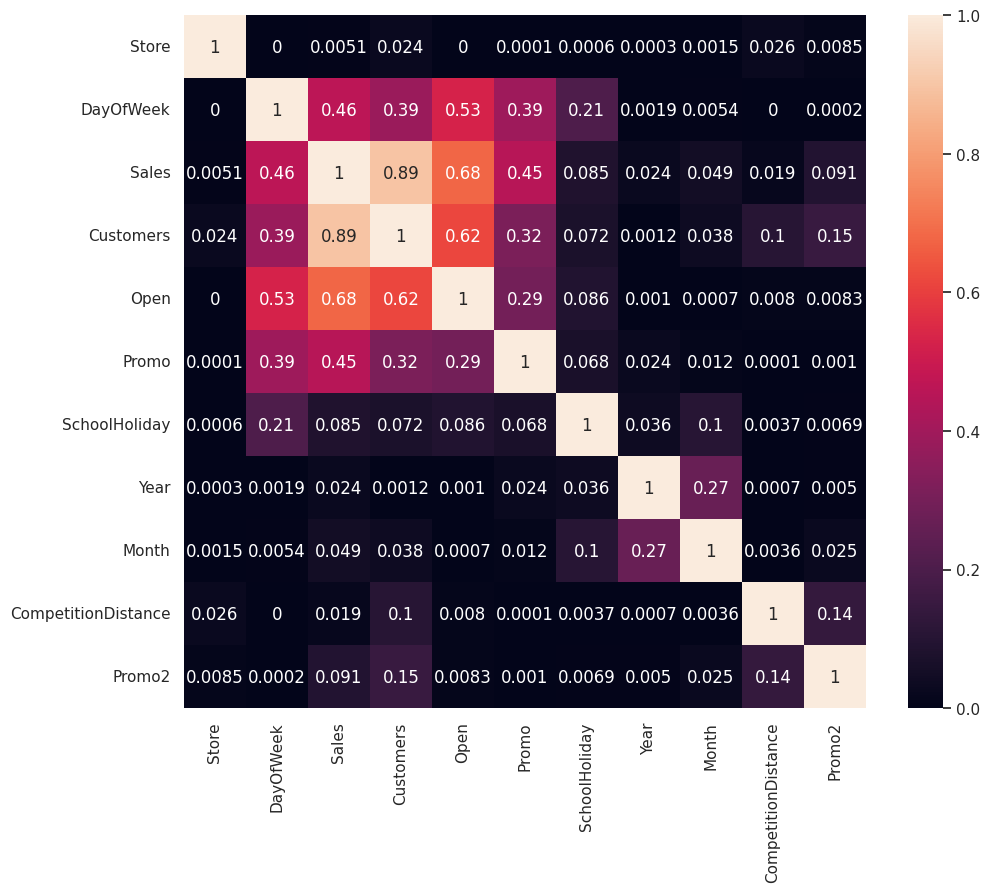

In [33]:
plt.subplots(figsize=(11,9))
sns.heatmap(sales.corr().abs().round(4), annot=True)

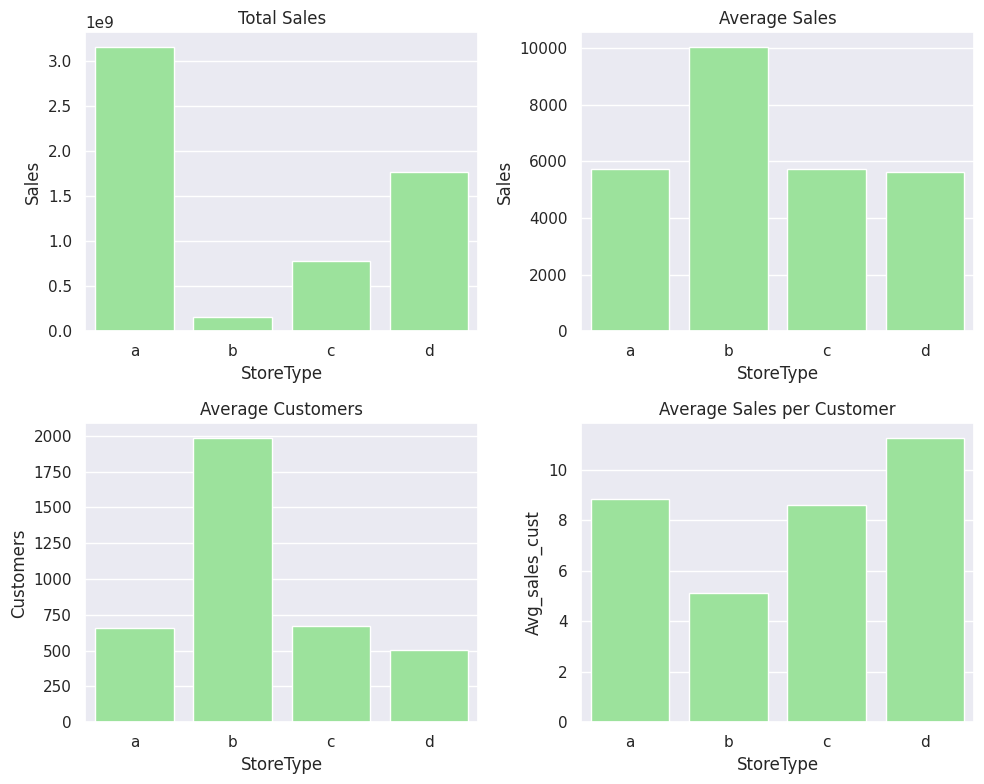

In [34]:
sales['Avg_sales_cust'] = sales['Sales']/sales['Customers']
a = sales.groupby('StoreType')['Sales'].sum().reset_index()
b = sales.groupby('StoreType')['Sales'].mean().reset_index()
c = sales.groupby('StoreType')['Customers'].mean().reset_index()
d = sales.groupby('StoreType')['Avg_sales_cust'].mean().reset_index()

# create figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# plot a in the first row, first column
sns.barplot(data=a, x='StoreType', y='Sales', ax=axs[0, 0], color = 'lightGreen')
axs[0, 0].set_title('Total Sales')

# plot b in the first row, second column
sns.barplot(data=b, x='StoreType', y='Sales', ax=axs[0, 1],  color = 'lightGreen')
axs[0, 1].set_title('Average Sales')

# plot c in the second row, first column
sns.barplot(data=c, x='StoreType', y='Customers', ax=axs[1, 0],  color = 'lightGreen')
axs[1, 0].set_title('Average Customers')

# plot d in the second row, second column
sns.barplot(data=d, x='StoreType', y='Avg_sales_cust', ax=axs[1, 1],  color = 'lightGreen')
axs[1, 1].set_title('Average Sales per Customer')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()

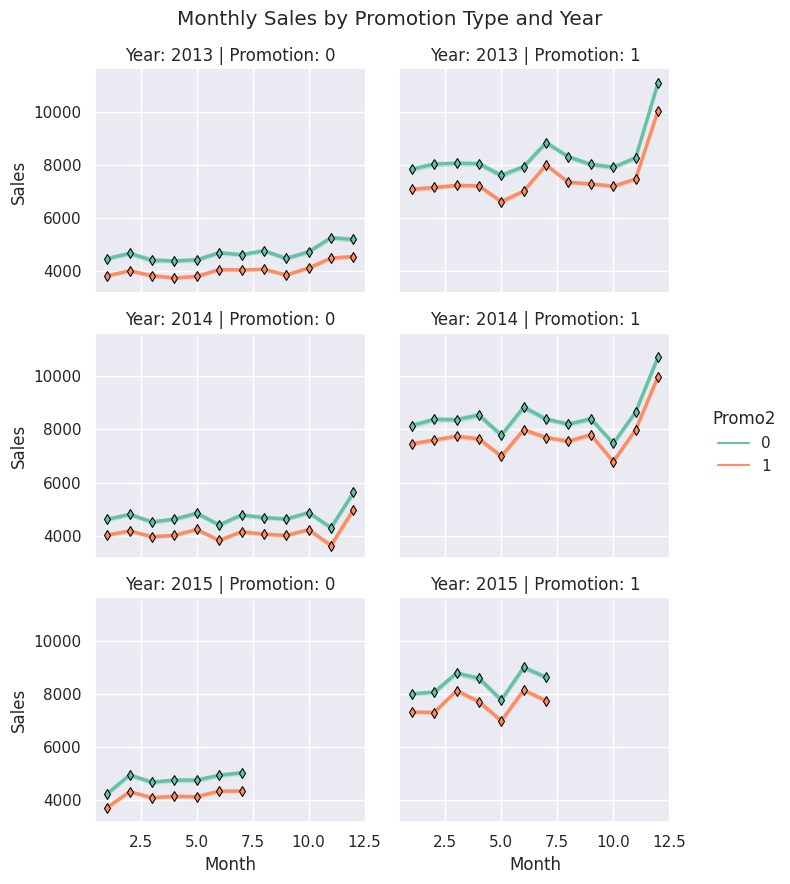

In [35]:
# create a line plot with multiple subplots
g = sns.relplot(data=sales, x="Month", y="Sales", 
                col='Promo', # per store type in cols
                hue='Promo2', 
                row="Year", 
                kind="line", 
                height=3, aspect=1.2, 
                palette='Set2',
                markers=True,
                marker='d', # set marker shape
                linewidth=2.5,
                markeredgecolor='black',
                markersize=5)

# set titles and labels for each subplot
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Sales by Promotion Type and Year')
g.set_titles(col_template="Promotion: {col_name}", row_template="Year: {row_name}")
g.set_axis_labels("Month", "Sales")

# adjust spacing between subplots
g.tight_layout()

# show the plot
plt.show()

# **Machine Learning**

In [36]:
#bias, multicollinearity, CV, HT 
#Linear(Ridge, Lasso), Logistic, Decision Tree, Random Forest

In [37]:
sales

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Avg_sales_cust
0,1,5,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0,9.482883
1,2,5,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1,9.702400
2,3,5,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1,10.126675
3,4,5,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0,9.342457
4,5,5,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,2013,1,01,a,a,1900.0,1,NaN
1017205,1112,2,0,0,0,0,a,1,2013,1,01,c,c,1880.0,0,NaN
1017206,1113,2,0,0,0,0,a,1,2013,1,01,a,c,9260.0,0,NaN
1017207,1114,2,0,0,0,0,a,1,2013,1,01,a,c,870.0,0,NaN


In [38]:
sales['StateHoliday'] = sales['StateHoliday'].map({0:0,'a':1,'b':1,'c':1})

In [39]:
sales = sales[sales['Open'] != 0]

In [40]:
sales[sales['Sales'] == 0]['Store'].sum()

31460

In [41]:
sales = sales[sales['Sales'] != 0]

In [42]:
sales = pd.get_dummies(sales, columns = ['StoreType', 'Assortment'])

In [53]:
sales.dropna(subset = ['CompetitionDistance'], inplace = True)

# Assigning Target and Independent variables

In [54]:
x = sales.drop(columns = ['Store', 'Sales', 'Year', 'Dates', 'Avg_sales_cust'], axis = 1)
y = sales.Sales

# Split the Data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [60]:
x_test

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
277462,2,443,1,0,0,0,11,3750.0,1,1,0,0,0,1,0,0
768360,1,1333,1,1,0,0,8,16490.0,0,1,0,0,0,0,0,1
716309,5,901,1,1,0,0,9,31830.0,0,0,0,1,0,0,0,1
693662,5,567,1,0,0,0,10,18710.0,0,1,0,0,0,0,0,1
934484,6,457,1,0,0,0,3,3920.0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673907,1,816,1,1,0,0,11,3580.0,0,0,0,0,1,0,0,1
864273,6,474,1,0,0,0,5,5460.0,1,1,0,0,0,0,0,1
112926,2,425,1,0,0,0,4,11300.0,0,0,0,0,1,1,0,0
300615,5,1614,1,1,0,1,10,1530.0,0,1,0,0,0,0,0,1


In [61]:
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [62]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [63]:
regressor.intercept_

-1018673628236766.0

In [64]:
regressor.coef_

array([-2.47232438e+02,  4.04958268e+04, -2.76060529e+14,  1.14178628e+03,
        2.78562931e+02,  2.85791730e+01,  2.65021117e+02,  1.90009075e+03,
        3.04638877e+02,  4.27127033e+15,  4.27127033e+15,  4.27127033e+15,
        4.27127033e+15, -3.25259670e+15, -3.25259670e+15, -3.25259670e+15])

In [65]:
y_pred_traindata = regressor.predict(x_train)

In [66]:
y_pred = regressor.predict(x_test)

In [69]:
mean_squared_error(y_test, y_pred)

1742210.8605749023

In [70]:
math.sqrt(mean_squared_error(y_test, y_pred))

1319.9283543340155

In [72]:
train_score_1=regressor.score(x_train,y_train)
train_score_1

0.8240417153584114

In [74]:
test_score_1 = regressor.score(x_test,y_test)
test_score_1

0.8203538704535742